<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Image%20Classification/Mnist_Fashion_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import time

from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


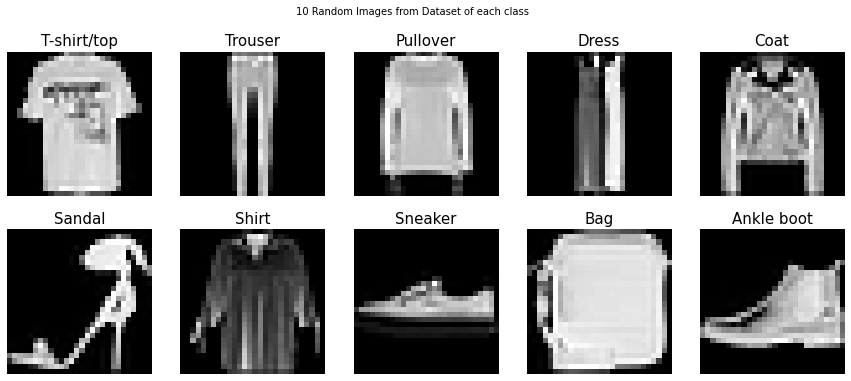

In [3]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx] not in d.keys():
          d[y_train[idx]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]], cmap = 'gray')
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 10)
plt.show()

In [4]:
# 4. prepare data
img_width = 28
img_height = 28
img_channel = 1
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_channel)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_channel)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# 5. build model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_channel)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [6]:
# 6. train model
start_time = time.time()

numOfEpoch = 20
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2,
                                            verbose = 1,factor = 0.5,min_lr = 0.00001)

H = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=numOfEpoch, 
              verbose=1, callbacks=[earlystop,learning_rate_reduction])

end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/20
750/750 [==============================] - 21s 6ms/step - loss: 0.5803 - accuracy: 0.7836 - val_loss: 0.3384 - val_accuracy: 0.8755 - lr: 0.0010
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3595 - accuracy: 0.8691 - val_loss: 0.2829 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3069 - accuracy: 0.8880 - val_loss: 0.2769 - val_accuracy: 0.8967 - lr: 0.0010
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2804 - accuracy: 0.8965 - val_loss: 0.2503 - val_accuracy: 0.9077 - lr: 0.0010
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2635 - accuracy: 0.9040 - val_loss: 0.2396 - val_accuracy: 0.9110 - lr: 0.0010
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2446 - accuracy: 0.9100 - val_loss: 0.2287 - val_accuracy: 0.9137 - lr: 0.0010
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - l

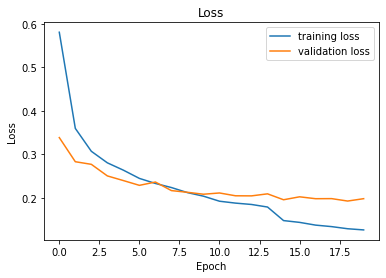

In [7]:
# 7. Vẽ đồ thị loss của traning set và validation set
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

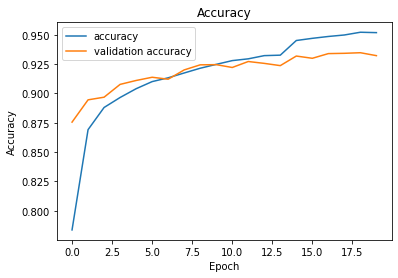

In [8]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
# 9. Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 3ms/step - loss: 0.2161 - accuracy: 0.9316
[loss, accuracy]:  [0.21610547602176666, 0.9315999746322632]
Running time: 1.09 (s)


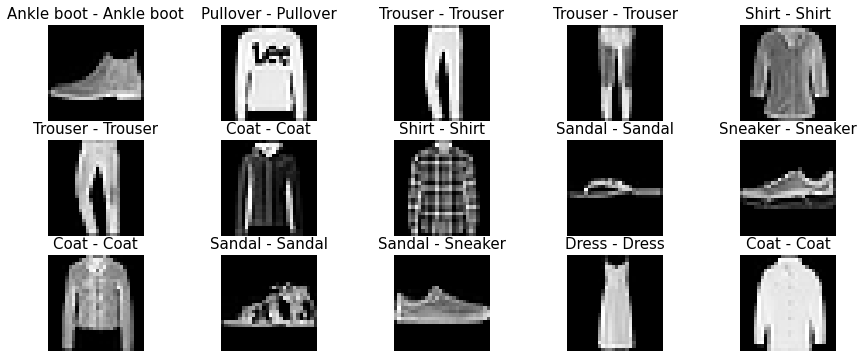

In [25]:
# 10.predict
rows = 3
cols = 5

y_pred = model.predict(X_test[0: rows * cols])
y_pred = np.argmax(y_pred, axis = 1)

fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(rows*cols):
    axes[i].imshow(X_test[i].reshape(img_width, img_height), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(label[y_pred[i]] + ' - ' + label[int(y_test[i])], fontsize=15)

In [30]:
# 11.save model
model.save("Minst_Fashion_Model.h5")